In [19]:
import os
import sys
import itertools
import networkx as nx
from typing import Callable
from collections import OrderedDict
from functools import partial

current = os.path.dirname(os.path.realpath(''))
parent = os.path.dirname(current)
sys.path.append(parent)
print(current+'/algorithms')

sys.path.insert(0, current+'/algorithms')

from geneticalgo import *
from brute_force_mis import BruteForce, genome_to_solution_nodes, _is_independet_set

/Users/davidfandrei/Desktop/UEvry/08_Algorithms/Project1/algorithms


### First, creating some helper functions for visualisation:

In [20]:
Graph = [nx.Graph]
FitnessFunc = Callable[[Genome], int]
NODE_COLORS = ['red', 'blue']

def add_color_values(graph: Graph, results: list) -> dict:
    val_map = {}
    for v in graph.nodes():
        if v in results:
            val_map[v] = 1
        else:
            val_map[v] = 0
    return val_map

def node_colors(graph: Graph, col_values: dict, colors: list) -> list:
    col_map = []
    for v in graph.nodes():
        if col_values[v] == 1:
            col_map.append(colors[0])
        else:
            col_map.append(colors[1])
    return col_map


### Defining Fitness Function:

In [21]:
def fitness(genome: Genome, graph: [Graph], phi = 0.1) -> int:
    if len(genome) != len(graph):
        raise ValueError("genome and graph must be of same length")
    dict = OrderedDict(sorted(nx.to_dict_of_lists(graph).items()))
    xi = []
    xi_edges = []
    xj = []

    for i, u in enumerate(dict.keys()):
        if genome[i] == 1:
            if u not in xi_edges:
                xi.append(u)
                for edge in dict[u]:
                    xi_edges.append(edge)
            else:
                xj.append(u)

    value = sum(xi) - phi * sum(xj)
    return value


### Creating a small graph of 8 nodes:

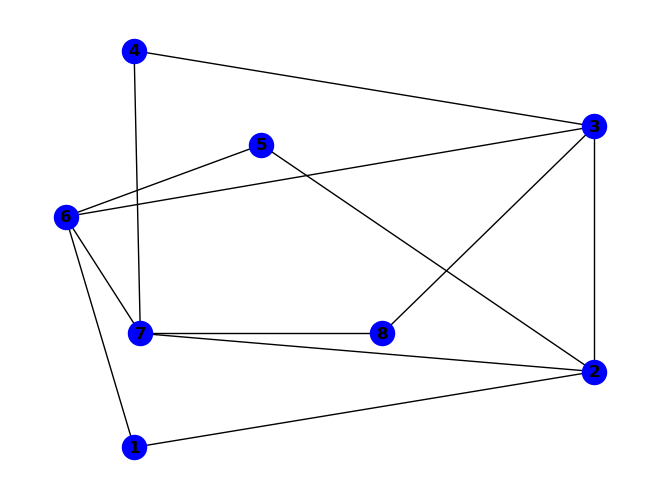

In [22]:
E= [(1, 2),
     (1, 6),
     (2, 3),
     (2, 5),
     (2, 7),
     (3, 6),
     (3, 8),
     (3, 4),
     (4, 7),
     (5, 6),
     (6, 7),
     (7, 8)]

# Convert to graph object

G = nx.Graph(E)
graph = nx.to_dict_of_lists(G)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', node_color='blue')

### Brute Force Solution:

[2, 4, 6, 8]


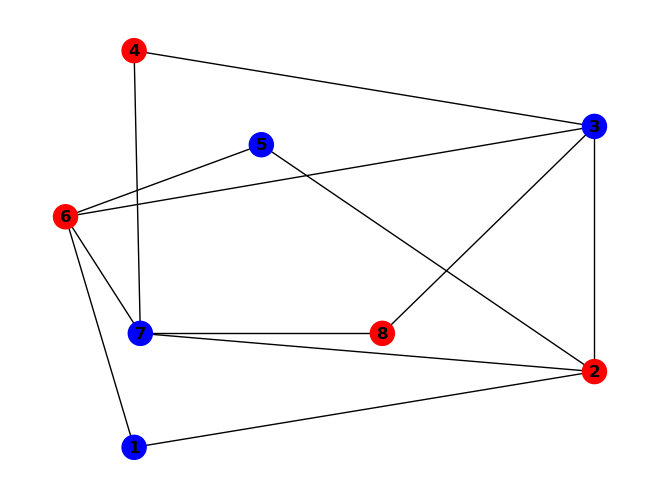

In [23]:
mis_bf = BruteForce(G)
res = mis_bf.Run()
print(res)

cols = node_colors(graph=G, col_values=add_color_values(G, res), colors=NODE_COLORS)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', node_color=cols)

#### Genetic Algorithm:

Number generations: 100
Best solution: [2, 4, 6, 8]


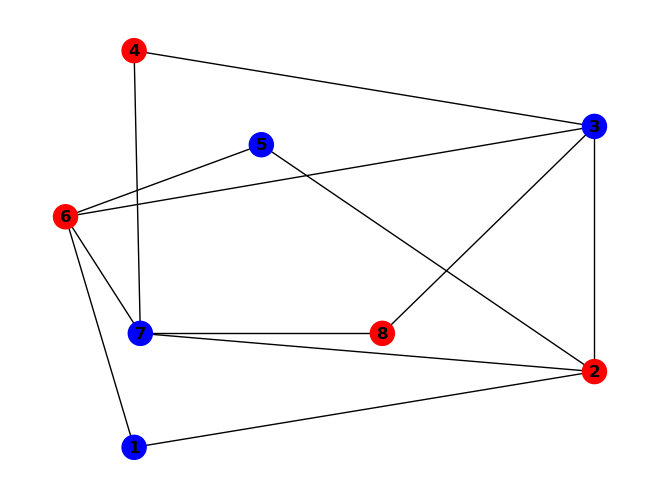

In [27]:
population, generations = run_evolution(
    populate_func = partial(generate_population, size=10, genome_length = len(G)),
    fitness_func = partial(fitness, graph=G, phi=1/len(G)),
    fitness_limit = None,
    selection_func=roulette_wheel_selection,
    generation_limit = 100,
    elitism = True
    )

print(f"Number generations: {generations}")
print(f"Best solution: {genome_to_solution_nodes(G, population[0])}")

cols_ga = node_colors(graph=G, col_values=add_color_values(G, genome_to_solution_nodes(G, population[0])), colors=NODE_COLORS)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', node_color=cols)